## Clustering

First step twoards implementing our cluster visualization is importing the needed libraries into the notebook.

In [6]:
#disable some annoying warning
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans, SpectralClustering
from sklearn import manifold
import matplotlib.patches as mpatches

import ipywidgets
from ipywidgets import interact, interactive, fixed

Next we load the data.

In [7]:
#load the iris datasets
import sklearn.datasets

data = sklearn.datasets.load_iris()
data.data.shape

(150, 4)

We define the following function for displaying the cluster plots. This will be used by the overview view of the cluster and also by the detail view.

In [24]:
def display_cluster_plot(param, cluster_algo, data, pos):
    algorithms = {
        "KMeans": KMeans(n_clusters=param, random_state = 102),
        "Spectral": SpectralClustering(n_clusters=param, random_state = 50)
          }
    prediction = algorithms.get(cluster_algo).fit_predict(data)
    
    plt.figure(figsize=(10, 8))
    plt.scatter(pos[:, 0], pos[:, 1], s=20, c=[colors[i] for i in prediction])
    return prediction

Next we prepare for the clustering:
 - we load the color pallete
 - we use MDS as a dimmension reduction technique for reducing the data to 2 dimmensions. This is needed for plotting the data in a scatter plot(2D).

In [25]:
colors = sns.color_palette()

#Dimension reduction using MDS
mds = manifold.MDS(n_components=2, random_state=5)
#fit the model and get the embedded coordinates
pos = mds.fit(data.data).embedding_

C:\Anaconda3\lib\site-packages\matplotlib\__init__.py:892: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


### The overview cluster plot
We now create the first interactive plot. We ise @interact annotation for making the plot interactive. The @interact parameters are the parameters used for clustering(i.e. number of clusters, cluster algorithm).

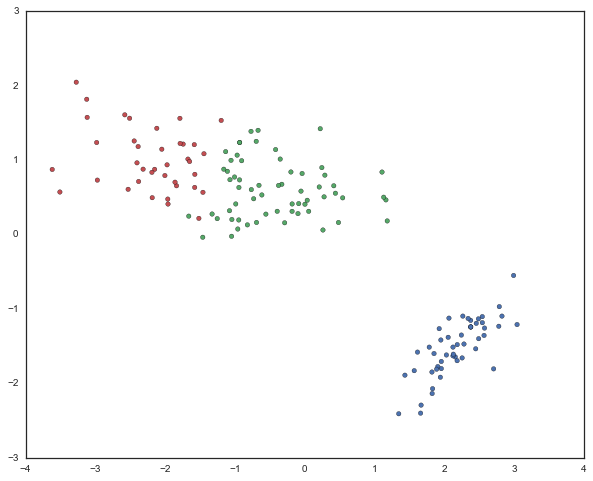

In [26]:
#global state
state ={}

@interact(cluster_count = (1,6), cluster_algo=["KMeans", "Spectral"])
def show_cluster(cluster_count, cluster_algo):
    prediction = display_cluster_plot(cluster_count, cluster_algo, data.data, pos)       
    state["clusters"]=prediction
    state["cluster_count"] = cluster_count

### The detail cluster plot
For this, we use the cluster prediction from the overciew plot. We use a slider for selecting the index of the cluster from the overview plot that we want to analyze in more detail. Again we have controls for the 2 clustering parameters: cluster count and cluster algorithm.

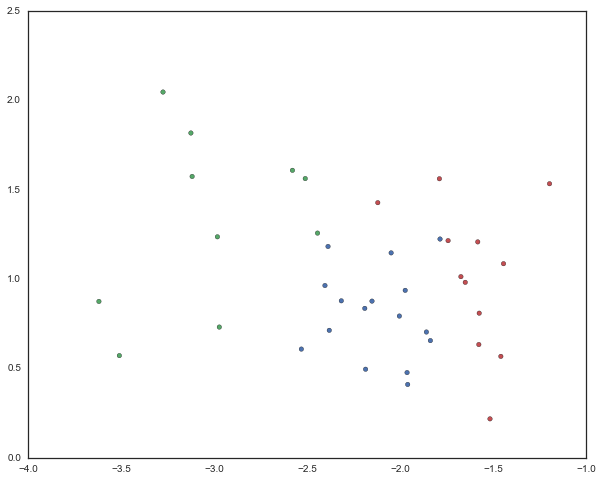

In [27]:
def get_detail_pos(prediction, param):
    detail_pos = []
    for i in range(prediction.size):
        if prediction[i] == param:
            detail_pos.append(pos[i])
    return np.array(detail_pos)

def get_detail_data(prediction, param):
    detail_data = []
    for i in range(prediction.size):
        if prediction[i] == param:
            detail_data.append(data.data[i])
    return np.array(detail_data)

@interact(cluster_idx=(0,state["cluster_count"]-1), cluster_param=widgets.IntText(value=2), cluster_algo=["KMeans", "Spectral"])
def show_detail_cluster(cluster_idx, cluster_param ,cluster_algo):
    prediction = state["clusters"]
    detail_pos = get_detail_pos(prediction, cluster_idx)
    detail_data =  get_detail_data(prediction, cluster_idx)
    display_cluster_plot(cluster_param, cluster_algo, detail_data, detail_pos) 
    